<a href="https://colab.research.google.com/github/chota-mota01/Capstone_Regression_Project-Yes_Bank_Stock_Closing_Price_Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Yes Bank, a leading institution in the Indian financial sector, garnered attention following the 2018 fraud case involving its former CEO, Rana Kapoor. The project was conducted individually, and after analysing the dataset, it was discovered that it contained 185 rows and 5 columns. This dataset comprises monthly stock prices of Yes Bank since its inception, including key metrics such as closing, opening, highest, and lowest prices for each month. The main objective of the project was to forecast the monthly closing price of Yes Bank's stock.

To avoid affecting the original data, a copy was made, and specified column was converted to appropriate data type. The analysis of the cleaned data provided valuable insights into stock closing price prediction. The columns of the dataset exhibit positive skewness. The application of log transformation has resulted in a more symmetrical distribution, thereby enhancing the accuracy of predictions. Moreover, the variables exhibit high correlation with each other. The log transformation effectively reduced outliers in the dataset, thereby contributing to a more robust model.

For data visualization, the researcher used the seaborn and matplotlib libraries and various types of graphs, such as distplot, line chart, scatter plot, box plot,histogram plot, correlation heatmap, and pair plot. These visualizations helped to simplify complex data and make it more understandable.

Four machine learning models were developed to forecast the monthly closing price of Yes Bank's stock.: Linear Regression, Lasso Regression, Ridge Regression, and Random Forest. 'Open', 'High', and 'Low' features were aggregated by taking their mean and engineered additional features using lag values to capture temporal trends and patterns, including potential effects of the fraud case. These models were evaluated using various metrics to gain insights into the data, facilitating better decision-making for improved outcomes. The evaluation metrics used were Mean Absolute Error(MAE),Mean Squared Error(MSE), Root Mean Squared Error(RMSE), R-squared(R2) and Adjusted R-squared. Additionally, cross-validation techniques were employed to estimate optimal values, have provided us with robust tools for making informed decisions regarding stock investment strategies.

Random Forest was selected as my final model due to its superior performance in terms of R2 and adjusted R2 values. These metrics indicate that Random Forest is effectively explaining the variance in the target variable while considering all features. Random Forest model attained the lowest Mean Absolute Error(MAE) value i.e. 3.301648.

SHAP (SHapley Additive exPlanations) stands as a sophisticated approach in exploring model interpretability within the realm of machine learning. This technique meticulously assesses the impact of each feature on the ultimate prediction, offering valuable insights into the nuanced influence of individual model components on the overall outcome.

Moreover, data visualization techniques have played a crucial role in simplifying complex data and facilitating a clearer understanding of stock price trends and patterns. By leveraging these insights, both investors and financial institutions can make data-driven decisions to optimize their investment portfolios and enhance their overall financial performance.

Overall, the findings of this analysis can empower stakeholders in the financial sector to adapt and respond effectively to market dynamics, thereby improving their services, mitigating risks, and ultimately, meeting the evolving needs and preferences of investors and customers alike.




# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Yes Bank, a prominent institution in the Indian financial sector, gained notoriety following the 2018 fraud case involving its former CEO, Rana Kapoor. This dataset encompasses monthly stock prices of Yes Bank since its establishment, encompassing metrics such as closing, opening, highest, and lowest prices for each month. The focal point revolves around discerning how such high-profile events, like the aforementioned scandal, have influenced the company's stock prices. Can time series models, or other predictive methodologies, effectively capture and predict the fluctuations resulting from such circumstances? The primary goal is to forecast the monthly closing price of Yes Bank's stock, leveraging insights gained from this analysis.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing datetime modules
from datetime import datetime
from datetime import date

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Read Dataset
path = '/content/drive/My Drive/Colab Notebooks/data_YesBank_StockPrices.csv'
ybank_data = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
# head() method returns first 5 rows of the dataset
ybank_data.head()

In [ ]:
# Dataset Last Look
# tail() method returns last 5 rows of the dataset
ybank_data.tail()

In [ ]:
# If number is specified, head() returns specified number of first rows
ybank_data.head(10)

In [ ]:
# If number is specified, tail() returns specified number of last rows
ybank_data.tail(10)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
ybank_data.shape

### Dataset Information

In [ ]:
# Dataset Info
ybank_data.info()

In [ ]:
# Columns present in the dataset
list(ybank_data.columns)

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
ybank_data.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
ybank_data.isna().sum().sum()

In [ ]:
#Used isnull().sum method to view null value in each column
ybank_data.isnull().sum()

In [ ]:
# Visualizing the missing values
# Check Null value by plotting Heatmap
from pickle import FALSE
plt.figure(figsize=(12,6))
sns.heatmap(ybank_data.isnull(),cbar=FALSE)

### What did you know about your dataset?

The given dataset contains the monthly stock prices of Yes Bank since its establishment and includes closing, opening, highest, and lowest prices for each month. The primary goal is to forecast the monthly closing price of the stock.

The dataset has 185 rows and 5 columns. The dataset contains 0 missing/null values and 0 duplicate values.

Using seaborn library, we have visualized no missing/null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
ybank_data.columns

In [ ]:
# Dataset Describe
ybank_data.describe(include='all')

### Variables Description

* **Date**       **:**  Date of the stock price record
* **Open**       **:**  Opening price of the stock
* **High**       **:**  Highest price of the stock for the day
* **Low**        **:**  Lowest price of the stock for the day
* **Close**      **:**  Closing price of the stock for the day

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable

for column in ybank_data:
  print(ybank_data[column].unique())

In [ ]:
# Count of Unique Values for each variable.
for col in ybank_data:
  print("Count of unique values in",col,"is",ybank_data[col].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create copy of the dataset
ybank_df = ybank_data.copy()
ybank_df.columns

In [ ]:
# Converting data type of date column
ybank_df['Date'] = pd.to_datetime(ybank_df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [ ]:
ybank_df.info()

In [ ]:
# Taking a Numerical Feature from Data
num_fea = ybank_df.describe().columns
num_fea

### What all manipulations have you done and insights you found?

Before manipulation of the data, I created a copy of the yes bank dataset because of which the changes made in the duplicate dataset won't affect the original dataset.

After creating copy of the dataset, I changed the datatype of the 'Date' variable to datetime. The remaining variables are numerical. The unique values in 'Date', 'Open', 'High', 'Low' and 'Close' is 185, 183, 184, 183 and 185 respectively . We also observed that the mean is higher in numerical columns .i.e.there is possibility of skewness. The given dataset contains no null and duplicate values.  

The dataset is good for better visualization.  

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Distplot of Dependent Variable

In [ ]:
# Chart - 1 visualization code
# Check Distribution of the dependent variable 'Close'
plt.figure(figsize=(12,5))
sns.distplot(ybank_df['Close'],color="b")
plt.gca().set_xlabel('Closing Price')
plt.gca().set_title('Distribution of Dependent Variable')
plt.axvline(ybank_df['Close'].mean(),color='brown')
plt.axvline(ybank_df['Close'].median(),color='yellow',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart was choosed because distplot, short for "distribution plot," represents the distribution of a univariate dataset. It combines a histogram with a kernel density estimate (KDE) plot, providing a visual summary of the distribution of values in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insight gained from the chart is that the data exhibits positive skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above chart, we can conclude that the closing price fluctuates over time, especially due to significant events such as the fraud in 2018, the data may exhibit positive skewness. Applying a transformation to the data could lead to a more symmetrical distribution, which can improve the accuracy of predicting the closing price.

#### Chart - 2 - Distplot of Dependent Variable with Transformation

In [ ]:
# Chart - 2 visualization code
# Apply Log transformation on Dependent variable 'Close'
plt.figure(figsize=(12,5))
sns.distplot(ybank_df['Close'],color="b")
plt.gca().set_xlabel('Closing Price')
plt.gca().set_title('Distribution of Dependent Variable after Transformation')
plt.axvline(np.log10(ybank_df['Close']).mean(),color='brown')
plt.axvline(np.log10(ybank_df['Close']).median(),color='yellow',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart was choosed because distplot, short for "distribution plot," represents the distribution of a univariate dataset. It combines a histogram with a kernel density estimate (KDE) plot, providing a visual summary of the distribution of values in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The log transformation was applied to normalize 'Close' column. After transformation, the data resembles a normal distribution, with the mean and median being nearly identical.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The dependent variable 'Close' follows the normal distribution. Developing a good model becomes easier when the data follows a normal distribution.

#### Chart - 3 - Lineplot of Closing Price yearly

In [ ]:
# Chart - 3 visualization code
# Doing Visualisation of Closing Price yearly
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Close',data=ybank_df)
plt.gca().set_xlabel('Date')
plt.gca().set_ylabel('Close')
plt.gca().set_title('Closing Price Yearly')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is a graphical representation of an asset's historical price action that connects a series of data points with a continuous line. It shows the relationship between two variables.

The specific chart shows the relationship between 'Date' and 'Close'.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that the closing price experienced a substantial decline following the fraud case in 2018.

#### Chart - 4 - Boxplot of Data

In [ ]:
# Chart - 4 visualization code
col = list(ybank_df.columns)

ybank_df[col].plot(kind='box', title='Boxplot of Data',color='red')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots are a measure of how well the data is distributed in the dataset. These charts display ranges within variables measured. This includes the outliers, the median, the mode, and where the majority of the data points lie in the “box”.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that outliers are present in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The outliers present in the data may lead to misleading insights and reduce model performance.

#### Chart - 5 - Boxplot of Independent Variable

In [ ]:
# Chart - 5 visualization code
ybank_price = np.log(ybank_df[['Open', 'High', 'Low']])
plt.figure(figsize=(8, 6))
ybank_price.boxplot()
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots are a measure of how well the data is distributed in the dataset. These charts display ranges within variables measured. This includes the outliers, the median, the mode, and where the majority of the data points lie in the “box”.

##### 2. What is/are the insight(s) found from the chart?

The log transformation is applied in the following chart. It appears that outliers have been mitigated or reduced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The absence of outliers in the data contributes to the development of a robust model. However, with a small dataset, it is generally not recommended to entirely eliminate outliers.

#### Chart - 6 - Histplot for Distibution of Independent Variables

In [ ]:
# Chart - 6 visualization code
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(ybank_df['Open'],kde='True',ax=axes[0],color='skyblue')
sns.histplot(ybank_df['High'],kde='True',ax=axes[1],color='red')
sns.histplot(ybank_df['Low'],kde='True',ax=axes[2],color='orange')

# Adjust layout
plt.suptitle('Distibution of Independent Variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of visualization commonly used to display the distribution of a univariate dataset. It represents the frequency or count of observations falling within predefined intervals, called bins, by plotting bars whose heights correspond to these counts.

##### 2. What is/are the insight(s) found from the chart?

The insight gained from the chart is that the independent variables in the data exhibits positive skewness (right-skewed).

#### Chart - 7 - Histplot for Distibution of Independent Variables After Transformation

In [ ]:
# Chart - 7 visualization code
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(np.log10(ybank_df['Open']),kde='True',ax=axes[0],color='skyblue')
sns.histplot(np.log10(ybank_df['High']),kde='True',ax=axes[1],color='red')
sns.histplot(np.log10(ybank_df['Low']),kde='True',ax=axes[2],color='orange')

# Adjust layout
plt.suptitle('Distibution of Transformed Independent Variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of visualization commonly used to display the distribution of a univariate dataset. It represents the frequency or count of observations falling within predefined intervals, called bins, by plotting bars whose heights correspond to these counts.

##### 2. What is/are the insight(s) found from the chart?

The log transformation was applied to normalize the independent columns(Open, High ,Low). After transformation, the data resembles a normal distribution.

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(12,6))
plt.scatter(x='Open',y='Close',data=ybank_df)
correlation=ybank_df['Open'].corr(ybank_df['Close'])
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Scatter plot for Open vs Close

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(12,6))
plt.scatter(x='Open',y='Close',data=ybank_df)
correlation=ybank_df['Open'].corr(ybank_df['Close'])
plt.gca().set_xlabel('Open')
plt.gca().set_ylabel('Close')
plt.gca().set_title('Open vs Close - correlation: ' + str(round((correlation),6)))
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are the graphs that represents the relationship between the specified two variables in the dataset. Each member of the dataset gets plotted as a point whose x-y coordinates relates to its values for the two variables.

The specific chart tells us the relationship between the opening price and the closing price.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that the opening price and closing price are highly correlated.

#### Chart - 9 - Scatter plot for High vs Close

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(12,6))
plt.scatter(x='High',y='Close',data=ybank_df)
correlation=ybank_df['High'].corr(ybank_df['Close'])
plt.gca().set_xlabel('High')
plt.gca().set_ylabel('Close')
plt.gca().set_title('High vs Close - correlation: ' + str(round((correlation),6)))
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are the graphs that represents the relationship between the specified two variables in the dataset. Each member of the dataset gets plotted as a point whose x-y coordinates relates to its values for the two variables.

The specific chart tells us the relationship between high price and the closing price.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that the high price and closing price are highly correlated.

#### Chart - 10 - Scatter plot for Low vs Close

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(12,6))
plt.scatter(x='Low',y='Close',data=ybank_df)
correlation=ybank_df['Low'].corr(ybank_df['Close'])
plt.gca().set_xlabel('Low')
plt.gca().set_ylabel('Close')
plt.gca().set_title('Low vs Close - correlation: ' + str(round((correlation),6)))
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots are the graphs that represents the relationship between the specified two variables in the dataset. Each member of the dataset gets plotted as a point whose x-y coordinates relates to its values for the two variables.

The specific chart tells us the relationship between the low price and the closing price.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that the low price and closing price are highly correlated.

#### Chart - 11 - Distplot for the Data

In [ ]:
# Chart - 11 visualization code
sns.distplot(ybank_df['Open'],kde=True,color='r')
sns.distplot(ybank_df['High'],kde=True,color='y')
sns.distplot(ybank_df['Low'],kde=True,color='b')
sns.distplot(ybank_df['Close'],kde=True,color='m')
plt.gca().set_title('Distribution of Variables')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart was choosed because distplot, short for "distribution plot," represents the distribution of a univariate dataset. It combines a histogram with a kernel density estimate (KDE) plot, providing a visual summary of the distribution of values in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insight derived from the chart is that the variables (open, close, low, high) exhibit positive skewness and are collectively represented.

#### Chart - 12 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,5))
cor = sns.heatmap(ybank_df.corr(),annot=True)

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

I used the correlation heatmap to find correlation between all the variables along with correlation coefficient.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, we can see that there is correlation between all the independent variables. Also, the dependent and independent variables are highly correlated.

#### Chart - 13 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(ybank_df)

##### 1. Why did you pick the specific chart?

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical. Pairplot allows us to plot pairwise relationships between variables within a dataset.

##### 2. What is/are the insight(s) found from the chart?

The pairplot basically plots entire dataframe. Plots between each column take place in pairplot and a big plot is created to compare overall relationship between each column. Some outliers can be seen in the data. This creates nice visualization and helps us understand the large amount of data in a single figure.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1- There is a difference between the closing stock prices from the years 2005 to 2015 and those from 2016 to 2020.

Statement 2- The closing prices between months with high opening prices and those in months with low opening prices exhibit a significant difference.

Statement 3- The maximum closing price recorded for Yes Bank's stock in the year 2018 exceeds 350 price.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is a difference between the closing stock prices from the years 2005 to 2015 and those from 2016 to 2020.

H0 - The closing stock prices from the years 2005 to 2015, in comparison to those from 2016 to 2020, exhibit no differences.

H1- The closing stock prices from the years 2005 to 2015, in comparison to those from 2016 to 2020, exhibit notable differences.

Significance level - 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Setting date as index
ybank_df.set_index('Date',inplace=True)

In [ ]:
# Perform Statistical Test to obtain P-Value
# Using z test to find p value
# Setting apla value to 0.05

from scipy import stats
alpha=0.05

# Divide dataset into two part to find the correct value
first_half=ybank_df['Close'][ybank_df.index.year <=2015]
second_half=ybank_df['Close'][ybank_df.index.year >=2016]

# Finding mean, standard deviation & sample size for the sample
mean1 = np.mean(first_half)
std1 = np.std(first_half)
n1 = len(first_half)
mean2 = np.mean(second_half)
std2 = np.std(second_half)
n2 = len(second_half)

# Calculate the standard error difference between the two means
standard_error = np.sqrt ((std1**2/n1)+(std2**2/n2))

# Calculate Z scure using standard error value
z = (mean1-mean2)/standard_error

# Calculate the p value (two tailed)
p_value = 2*(1-stats.norm.cdf(abs(z)))

# Significance value of alpha is already set which is 0.05 so comparing p value with z
if p_value < alpha:
  print('Reject the Null Hypothesis as it is evident that there is significant difference in mean')
else:
  print ('Failed to reject Null Hypothesis as it is evident that there is not significant difference in mean')

##### Which statistical test have you done to obtain P-Value?

The Z-test is a statistical hypothesis test that is used to compare the mean of a sample to a known population mean or to compare the means of two samples, assuming that the population standard deviation is known. It is commonly used when the sample size is large (typically n > 30) and the population variance is known.

Given that the dataset comprises more than 30 records, the Z-test was employed to calculate the p-value.

##### Why did you choose the specific statistical test?

As the dataset contains more than 30 records and the Z-test is used to obtain a p-value, likely performed a Z-test for a mean and standard deviation.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The closing prices between months with high opening prices and those in months with low opening prices exhibit a significant difference.

Null Hypothesis (H0): The mean closing prices in months with high opening prices are equal to or lower than the mean closing prices in months with low opening prices.

Alternative Hypothesis (HA): The mean closing prices in months with high opening prices are higher than the mean closing prices in months with low opening prices.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Calculating the mean opening and closing prices for each month
ybank_df['Month'] = ybank_df.index.strftime('%Y-%m')
monthly_data = ybank_df.groupby('Month').agg({'Open': 'mean', 'Close': 'mean'})

# Setting a threshold for high and low opening prices
threshold = monthly_data['Open'].median()

# Dividing the data into groups low and high opening prices based on threshold value of opening value
high_opening_prices = monthly_data[monthly_data['Open'] > threshold]['Close']
low_opening_prices = monthly_data[monthly_data['Open'] <= threshold]['Close']

# Calculating the mean,standard deviation & size for sample
mean_high = np.mean(high_opening_prices)
mean_low = np.mean(low_opening_prices)
std_high = np.std(high_opening_prices)
std_low = np.std(low_opening_prices)
n_high = len(high_opening_prices)
n_low = len(low_opening_prices)

# Calculate the z-statistic
z_statistic = (mean_high - mean_low) / np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the p-value
p_value = 1 - stats.norm.cdf(z_statistic)
# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
 print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
 print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")

# Using independent t test as well
t_statistic,p_value = stats.ttest_ind(low_opening_prices, high_opening_prices)
# Setting Significance value alpha
alpha=0.05

# Compare the p-value with the significance level
if p_value < alpha:
  print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")

##### Which statistical test have you done to obtain P-Value?

To obtain P-value, Z-test and t-test are used.



##### Why did you choose the specific statistical test?

If the population standard deviation is known and the sample size is large, a Z-test is typically used. If the population standard deviation is unknown or the sample size is small, a t-test is more appropriate.

Since the data is not normally distributed, skewness is a factor to consider.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The maximum closing price recorded for Yes Bank's stock in the year 2018 exceeds 350 price.

Null Hypothesis(H0) - The maximum closing price recorded for Yes Bank's stock in the year 2018 does not exceed 350 price.

Alternative Hypothesis(H1) - The maximum closing price recorded for Yes Bank's stock in the year 2018 exceeds 350 price.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
mean = 100

# Calculating the mean closing price for year
ybank_df['Year'] = ybank_df.index.strftime('%Y')
yearly_data = ybank_df.groupby('Year').agg({'Close': 'mean'})

# Calculating the mean, standard deviation and size for sample
sample_mean=np.mean(ybank_df['Close'][ybank_df['Year']==2018])
sample_std=np.std(ybank_df['Close'][ybank_df['Year']==2018])
sample_size=ybank_df['Close'][ybank_df['Year']==2018].size

# Implementing z test to obtain p value
z_stat = (sample_mean-mean) / (sample_std/np.sqrt(sample_size))
p_value_new = 1-stats.norm.cdf(z_stat)

# Set the significance level
alpha = 0.05

# Now Comparing the p-value with the significance level
if p_value < alpha:
 print("Reject the null hypothesis as there are significant evidence regarding Closing price")
else:
 print("Fail to reject the null hypothesis. There is no significant evidence in the mean closing prices.")

##### Which statistical test have you done to obtain P-Value?

To obtain p value, z test is done.
The Z-test is a statistical hypothesis test that is used to compare the mean of a sample to a known population mean or to compare the means of two samples, assuming that the population standard deviation is known. It is commonly used when the sample size is large (typically n > 30) and the population variance is known.

##### Why did you choose the specific statistical test?

As the dataset contains more than 30 records and the Z-test is used to obtain a p-value.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
'''There are no missing values in the dataset.'''
ybank_df.isnull().sum()


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
'''Outliers have been addressed through transformation, eliminating the need for additional outlier treatment.
Given the small size of the dataset and the limited number of columns, outliers were not directly removed.'''

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers have been treated through log transformation. Given the small size of the dataset and the limited number of columns, outliers were not directly removed.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
'''There are no categorical columns in this dataset; therefore, this step is skipped.'''

#### What all categorical encoding techniques have you used & why did you use those techniques?

There are no categorical columns in this dataset; therefore, this step is skipped.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
'''As the correlation chart indicated strong relationships between all independent variables and the dependent variable, a new feature named
"independent_mean" is created using the mean of all independent variables.'''

ybank_df['independent_mean']= ybank_df[['Open','High','Low']].mean(axis=1).round(2)
ybank_df.head()

In [ ]:
# Distribution for independent_mean variable
sns.displot(ybank_df['independent_mean'])

In [ ]:
# Applying log transform on indepent_mean variable
x = np.log10(ybank_df['independent_mean'])
sns.displot(x)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Using lags as additional features
for i in range(1, 14):
    ybank_df["lag_{}".format(i)] = ybank_df.independent_mean.shift(i)

In [ ]:
# Correlation using heatmap between features
plt.figure(figsize=(15,6))
sns.heatmap(ybank_df.corr())
plt.show()

In [ ]:
# Dividing the variable as independent and dependent for further transformation
y_depend = ybank_df.dropna().Close.values
x_independ = ybank_df.dropna().drop(['Open','High','Low','Month'], axis=1)

##### What all feature selection methods have you used  and why?

Lag is used as additional feature.
The lag features provide historical information about the stock's price movements, allowing the model to capture trends and seasonality.

##### Which all features you found important and why?

All the independent variable(Open,High,Low) are the important features as they are highly correlated with dependent variable(Close).

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Transforming independent variable
x_independ['independent_mean']=np.log10(x_independ['independent_mean'])

# Transforming dependent variable data
Y = np.log10(y_depend)

Both the independent and dependent variables exhibit skewness, albeit small. To address this, a log transformation was applied.

### 6. Data Scaling

In [ ]:
# Scaling your data
# For Scaling, using StandardScalar
scaler= StandardScaler()

x_scaled=scaler.fit_transform(x_independ.values)

##### Which method have you used to scale you data and why?
The given data appears normally distributed after applying log transformation, so we used 'Standard Scaler' for scaling of data. StandardScaler is a useful preprocessing step that can improve the performance, stability, and interpretability of machine learning models, particularly when working with algorithms that require scaled input features.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

The given dataset contains only a few features, applying dimensionality reduction may not be necessary, and we can focus on other aspects of model development, such as feature engineering, model selection, and hyperparameter tuning, to optimize predictive performance.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Spliting data into train and test sets using train test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state = 1)
print(x_train.shape)
print(x_test.shape)


##### What data splitting ratio have you used and why?

The splitting ratio 80:20 is considered here. It's essential to consider the specific characteristics of the dataset and the requirements of the problem at hand when determining the optimal train-test split ratio.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In my assessment, the provided dataset does not exhibit class imbalance.

In [ ]:
# Handling Imbalanced Dataset (If needed)
'''In my assessment, the provided dataset does not exhibit class imbalance.'''

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model 1 - Linear Regression

A linear regression model is a statistical method used to model the relationship between one or more independent variables (predictors) and a dependent variable (outcome). It assumes a linear relationship between the predictors and the outcome, where the outcome variable is a linear combination of the predictor variables, with each predictor weighted by a coefficient.

We implemented linear regression model assuming linear relationship between independent variables (Open, High, Low) and a dependent variable (Close).

In [ ]:
# ML Model - 1 Implementation
# Fit the Algorithm
reg= LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)

In [ ]:
reg.coef_

In [ ]:
# Predict on the model
y_train_pred= reg.predict(x_train)
y_test_pred= reg.predict(x_test)

In [ ]:
print(f'Training Score : {reg.score(x_train,y_train)}')
print(f'Testing Score : {reg.score(x_test,y_test)}')

In [ ]:
from sklearn.metrics import mean_squared_error

#Evaluating metrics score
MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

In [ ]:
# Evaluating metric scores for both train and test data
print('Metrics for Train Data are as follows:')
print('\n')
train_MAE = mean_absolute_error(10**(y_train),(10**y_train_pred))
print("MAE :", train_MAE)

train_MSE  = mean_squared_error(10**(y_train), 10**(y_train_pred))
print("MSE :" , train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("RMSE :" ,train_RMSE)

train_r2 = r2_score(10**(y_train), 10**(y_train_pred))
print("R2 :" ,train_r2)

train_adj_r2=1-(1-r2_score(10**(y_train), 10**(y_train_pred)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adj_r2)
print('\n')

print('Metrics for Test Data are as follows:')
print('\n')

MAE = mean_absolute_error(10**(y_test),(10**y_test_pred))
print(f"MAE : {MAE}")

MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred))
print("R2 :" ,r2)

adj_r2=1-(1-r2_score(10**(y_test), 10**(y_test_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adj_r2)


In [ ]:
lin_reg_list = {'Train Mean Absolute Error':train_MAE,'Train Mean squared Error' : train_MSE,'Train Root Mean squared Error' : train_RMSE,'Train R2 score' : train_r2,'Train Adjusted R2 score' : train_adj_r2,'Mean Absolute Error':MAE,'Mean squared Error' : MSE,'Root Mean squared Error' : RMSE,'R2 score' : r2,'Adjusted R2 score' : adj_r2 }
eva_metrics = pd.DataFrame.from_dict(lin_reg_list, orient='index').reset_index()
eva_metrics = eva_metrics.rename(columns={'index':' Evaluation Metric',0:'reg'})
eva_metrics

The test set exhibits lower Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) values compared to the train set. This suggests that the model performs better on the test data than on the training data.

The R2 score for the test set is slightly higher than that for the train set, suggesting that the model generalizes well to unseen data.

However, the adjusted R2 score for the test set is lower than that for the train set, indicating a potential overfitting issue, where the model may be fitting too closely to the training data.

Overall, the model demonstrates good performance on both the train and test sets, with low errors and high R2 scores. However, it's crucial to monitor the adjusted R2 score and be cautious of overfitting when interpreting the results. To mitigate overfitting, regularization techniques such as Ridge regression or Lasso regression can be applied.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
metrics=['MAE','MSE','RMSE','R2','Adjusted R2']
metrics_score=[MAE,MSE,RMSE,r2,adj_r2]
plt.figure(figsize=(12,6))
plt.plot(metrics,metrics_score,color='red', linewidth = 3,marker='o', markerfacecolor='green', markersize=12)
plt.gca().set_xlabel('Evaluation Metrics')
plt.gca().set_ylabel('Metrics Scores')
plt.gca().set_title('Visualization of Evaluation Metrics')
plt.show()

In [ ]:
#Visualizing actual and predicted values
plt.figure(figsize=(8,5))
plt.plot(10**(y_test_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],

    'positive': [True, False]
}

# Create the grid search object
Lr_gs=GridSearchCV(reg,param_grid=parameter,cv=5,scoring='r2')

# Fit the Algorithm
Lr_gs.fit(x_train,y_train)

# Predict on the model
y_pred_test_gs=Lr_gs.predict(x_test)
y_pred_train_gs=Lr_gs.predict(x_train)

In [ ]:
Lr_gs.best_score_

In [ ]:
#Visualizing Actual vs Prediction values for Linear Regression
plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_pred_test_gs))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.tight_layout()
plt.show()


In [ ]:
linear_reg_list = {'MAE' : MAE,'MSE' : MSE,'RMSE' : RMSE ,'R2 score' : r2,'Adjusted R2 score' : adj_r2}
evl_metrics = pd.DataFrame.from_dict(linear_reg_list, orient='index').reset_index()
evl_metrics = evl_metrics.rename(columns={'index':'Evaluation Metric',0:'Linear'})
evl_metrics

##### Which hyperparameter optimization technique have you used and why?

GridSearch cross-validation is a valuable technique for evaluating and optimizing linear regression models, ensuring that they generalize well to new data and provide reliable predictions. It helps improve the robustness and generalization ability of the model, leading to more accurate and reliable results in real-world applications.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The application of GridSearchCV on the dataset did not result in a significant improvement in the model's performance scores.

### ML Model - 2 - Lasso Regression (L1 Regularization)

Lasso regression, short for Least Absolute Shrinkage and Selection Operator, is a regression technique that performs both variable selection and regularization to improve the predictive performance and interpretability of the model.

In [ ]:
# ML Model - 2 Implementation
from sklearn.linear_model import Lasso
lasso  = Lasso()

# Fit the Algorithm
lasso.fit(x_train, y_train)
lasso.score(x_train, y_train)

# Predict on the model
y_pred_las_test = lasso.predict(x_test)
y_pred_las_train= reg.predict(x_train)

print(f'Training Score : {lasso.score(x_train,y_train)}')
print(f'Testing Score : {lasso.score(x_test,y_test)}')

In [ ]:
MAE_lasso = mean_absolute_error(10**(y_test),(10**y_pred_las_test))
print("MAE :", MAE_lasso)

MSE_lasso  = mean_squared_error(10**(y_test), 10**(y_pred_las_test))
print("MSE :" , MSE_lasso)

RMSE_lasso = np.sqrt(MSE_lasso)
print("RMSE :" ,RMSE_lasso)

r2_lasso = r2_score(10**(y_test), 10**(y_pred_las_test))
print("R2 :" ,r2_lasso)

adj_r2_lasso = 1-(1-r2_score(10**(y_test), 10**(y_pred_las_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_lasso)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
metric_lasso=['MAE','MSE','RMSE','R2']
metrics_score_las=[MAE_lasso,MSE_lasso,RMSE_lasso,r2_lasso]
plt.figure(figsize=(12,6))
plt.plot(metric_lasso,metrics_score_las,color='blue', linewidth = 3,marker='o', markerfacecolor='yellow', markersize=10)
plt.gca().set_xlabel('Evaluation Metrics')
plt.gca().set_ylabel('Metrics Scores')
plt.gca().set_title('Visualization of Evaluation Metrics')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=10)
# Fit the Algorithm
lasso_regressor.fit(x_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " r2 score is: ", lasso_regressor.best_score_)


# Predict on the model
y_pred_lasso = lasso_regressor.predict(x_test)

#Visualizing Actual vs Prediction values for Lasso
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


In [ ]:
evl_metrics['Lasso']=[MAE_lasso,MSE_lasso,RMSE_lasso ,r2_lasso,adj_r2_lasso]
evl_metrics

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique used for hyperparameter optimization for the given dataset - linear regression model. GridSearchCV automates the process of hyperparameter tuning by systematically searching through different combinations of hyperparameters and selecting the combination that yields the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

MSE score reduced compared to the previous model which indicates the model is predicting good on unseen data.

The best fit alpha value is found 0.001 and R2 score is 0.98174.
The inclusion of additional independent variables may not contribute significantly to the model's predictive power.

Overall, the model shows good performance after optimization.

### ML Model - 3 - Ridge Regression (L2 Regularization)

Ridge Regression, also known as L2 Regularization, is a linear regression technique that incorporates regularization to prevent overfitting and improve the generalization of the model.

In [ ]:
# ML Model 3 Implementation
from sklearn.linear_model import Ridge
ridge  = Ridge()
ridge.fit(x_train, y_train)

# Fit the Algorithm
ridge.fit(x_train, y_train)
ridge.score(x_train, y_train)

# Predict on the model
y_pred_ridge = ridge.predict(x_test)
print(f'Training Score : {ridge.score(x_train,y_train)}')
print(f'Testing Score : {ridge.score(x_test,y_test)}')

In [ ]:
#Evaluating Metric scores
MAE_ridge = mean_absolute_error(10**(y_test),(10**y_pred_ridge))
print("MAE :", MAE_ridge)

MSE_ridge  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE_ridge)

RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :" ,RMSE_ridge)

r2_ridge = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2_ridge)

adj_r2_ridge = 1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_ridge)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
metric_ridge=['MAE','MSE','RMSE','R2']
metrics_score_rid=[MAE_ridge,MSE_ridge,RMSE_ridge,r2_ridge]
plt.figure(figsize=(12,6))
plt.plot(metric_ridge,metrics_score_rid,color='yellow', linewidth = 3,marker='o', markerfacecolor='green', markersize=10)
plt.gca().set_xlabel('Evaluation Metrics')
plt.gca().set_ylabel('Metrics Scores')
plt.gca().set_title('Visualization of Evaluation Metrics')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
parameters = {'alpha': np.arange(-100,100,0.1)}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)

# Fit the Algorithm
ridge_regressor.fit(x_train,y_train)

# Predict on the model
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

In [ ]:
y_pred_r = ridge.predict(x_test)

In [ ]:
#Visualizing Actual vs Prediction values for Lasso
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_r))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


In [ ]:
evl_metrics['Ridge']=[MAE_ridge,MSE_ridge,RMSE_ridge,r2_ridge,adj_r2_ridge]
evl_metrics

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to search over different values of the regularization parameter alpha for Ridge regression. The best model and its associated hyperparameters are then selected based on cross-validated performance, and the final performance of the best model is evaluated on the test set.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The model has shown significant improvement compared to previous ones, exhibiting the lowest Mean Absolute Error (MAE) and effectively addressing the overfitting issue encountered with the second model. Therefore, I am leaning towards selecting the Ridge Regression (L2 Regularization) model as the best choice among the three.

### ML Model - 4 - Random Forest

Random Forest Regression is a machine learning technique that utilizes an ensemble of decision trees to make predictions. It's well-suited for regression tasks and offers advantages such as handling non-linear relationships and interactions between features, as well as being robust to overfitting and capable of handling large datasets with high dimensionality.

In [ ]:
# ML Model - 4 Implementation
rfr = RandomForestRegressor()

# Fit the Algorithm
rfr.fit(x_train, y_train)
rfr.score(x_train, y_train)

# Predict on the model
y_rfr_train_pred= rfr.predict(x_train)
y_rfr_test_pred= rfr.predict(x_test)

print(f'Training Score : {rfr.score(x_train,y_train)}')
print(f'Testing Score : {rfr.score(x_test,y_test)}')

In [ ]:
# Evaluating Metric Score for train set
train_MAE_rf = mean_absolute_error(10**(y_train),(10**y_rfr_train_pred))
print(f"MAE : {train_MAE_rf}")


train_MSE_rf  = mean_squared_error(10**(y_train), 10**(y_rfr_train_pred))
print("MSE :" , train_MSE_rf)

train_RMSE_rf = np.sqrt(train_MSE_rf)
print("RMSE :" ,train_RMSE_rf)

train_r2_rf = r2_score(10**(y_train), 10**(y_rfr_train_pred))
print("R2 :" ,train_r2_rf)

train_adj_r2_rf=1-(1-r2_score(10**(y_train), 10**(y_rfr_train_pred)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adj_r2_rf)

print('\n')

# Evaluating Metric Score for test set
MAE_rf = mean_absolute_error(10**(y_test),(10**y_rfr_test_pred))
print(f"MAE : {MAE_rf}")

MSE_rf  = mean_squared_error(10**(y_test), 10**(y_rfr_test_pred))
print("MSE :" , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

r2_rf = r2_score(10**(y_test), 10**(y_rfr_test_pred))
print("R2 :" ,r2_rf)

adj_r2_rf=1-(1-r2_score(10**(y_test), 10**(y_rfr_test_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adj_r2_rf)

In [ ]:
RF_reg_list = {'Train Mean Absolute Error':train_MAE_rf,'Train Mean squared Error' : train_MSE_rf,'Train Root Mean squared Error' : train_RMSE_rf,'Train R2 score' : train_r2_rf,'Train Adjusted R2 score' : train_adj_r2_rf,'Mean Absolute Error':MAE_rf,'Mean squared Error' : MSE_rf,'Root Mean squared Error' : RMSE_rf,'R2 score' : r2_rf,'Adjusted R2 score' : adj_r2_rf }
evr_metrics = pd.DataFrame.from_dict(RF_reg_list, orient='index').reset_index()
evr_metrics = eva_metrics.rename(columns={'index':' Evaluation Metric',0:'Random Forest'})
evr_metrics

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
metric_rf=['MAE','MSE','RMSE','R2','Adjusted R2']
metrics_score_rf=[MAE_rf,MSE_rf,RMSE_rf,r2_rf,adj_r2_rf]
plt.figure(figsize=(12,6))
plt.plot(metric_rf,metrics_score_rf,color='yellow', linewidth = 3,marker='o', markerfacecolor='red', markersize=12)
plt.gca().set_xlabel('Evaluation Metrics')
plt.gca().set_ylabel('Metrics Scores')
plt.gca().set_title('Visualization of Evaluation Metrics')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_rfr_test_pred)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {'n_estimators': [50,80,100,200,300],
                 'max_depth': [1,2,6,7,8,9,10,20,30,40],
                 'min_samples_split':[10,20,30,40,50,100,150,200],
                 'min_samples_leaf': [1,2,8,10,20,40,50]}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rfr, param_grid_rf,verbose=2, cv=5, scoring='r2')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_

print(best_model_rf_rs)

In [ ]:
# Predict the model
y_rf_rs_pred_train= random_search.predict(x_train)
y_rf_rs_pred_test= random_search.predict(x_test)
random_search.score(x_train,y_train)

In [ ]:
# Metric Score for train set
train_MAE_rf_rs = mean_absolute_error(10**(y_train),(10**y_rf_rs_pred_train))
print(f"MAE : {train_MAE_rf_rs}")


train_MSE_rf_rs  = mean_squared_error(10**(y_train), 10**(y_rf_rs_pred_train))
print("MSE :" , train_MSE_rf_rs)

train_RMSE_rf_rs = np.sqrt(train_MSE_rf_rs)
print("RMSE :" ,train_RMSE_rf_rs)

train_r2_rf_rs = r2_score(10**(y_train), 10**(y_rf_rs_pred_train))
print("R2 :" ,train_r2_rf_rs)

train_adjusted_r2_rf_rs=1-(1-r2_score(10**(y_train), 10**(y_rf_rs_pred_train)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf_rs)

print('\n')

# Metric Score for test set
MAE_rf_rs = mean_absolute_error(10**(y_test),(10**y_rf_rs_pred_test))
print(f"MAE : {MAE_rf_rs}")

MSE_rf_rs  = mean_squared_error(10**(y_test), 10**(y_rf_rs_pred_test))
print("MSE :" , MSE_rf_rs)

RMSE_rf_rs = np.sqrt(MSE_rf_rs)
print("RMSE :" ,RMSE_rf_rs)

r2_rf_rs = r2_score(10**(y_test), 10**(y_rf_rs_pred_test))
print("R2 :" ,r2_rf_rs)

adjusted_r2_rf_rs=1-(1-r2_score(10**(y_test), 10**(y_rf_rs_pred_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf_rs)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_rf_rs_pred_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
evl_metrics['Random Forest']=[MAE_rf,MSE_rf,RMSE_rf ,r2_rf,adj_r2_rf]
evl_metrics

##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV is a technique used for hyperparameter optimization in machine learning, including for Random Forest models. It efficiently searches through a specified number of random combinations of hyperparameters and selects the combination that yields the best performance. This method saves time compared to exhaustive grid search by randomly sampling hyperparameters from predefined distributions. After fitting the RandomizedSearchCV object to the training data and selecting the best model based on cross-validated performance, the final model's performance is evaluated on the test set to obtain an unbiased estimate of its performance on unseen data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From evaluation metric chart, we can conclude that Random Forest holds the lowest Mean Absolute Error(MAE). After applying cross-validation and hyperparameter tuning, the model has shown improvement by effectively addressing the overfitting issue.






### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Using Mean Squared Error (MSE) and Adjusted R-squared (Adj R2) as evaluation metrics positively impacts model performance and decision-making in various ways:

Improved Prediction Accuracy: Optimization based on MSE and Adj R2 enhances prediction accuracy, enabling more precise decision-making. This results in better resource allocation and reduced costs associated with errors.

Enhanced Model Selection: Comparing models using MSE and Adj R2 helps select the most appropriate model for a specific problem, leading to improved performance and outcomes.

In summary, the evaluation metrics offer insights into data, improve decision-making, and ultimately drive better outcomes for businesses.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have selected Random Forest as my final model due to its superior performance in terms of R2 and adjusted R2 values. These metrics indicate that Random Forest is effectively explaining the variance in the target variable while considering all features.

Although Ridge Regression also performed well, it showed a lower adjusted R2 on the test data compared to the train data. This suggests that not all features are necessary for Ridge Regression to predict the closing price. However,it deliberately included lag values in the features to capture previous data and patterns.

By using cross-validation to estimate the optimal value of alpha in Ridge Regression, we can build a more robust and generalizable model that performs well on new data.

Whether Random Forest or Ridge Regression is better depends on the specific requirements of the problem, including the nature of the data, the need for interpretability, and the desired level of performance.Random Forest is a non-linear model that can capture complex relationships between features and the target variable. On the other hand, Ridge Regression is a linear model that assumes a linear relationship between features and the target variable.

Overall, Random Forest's ability to capture all features and still predict better than Ridge Regression, along with its lower RMSE and better performance on the test data compared to the train data, makes it the preferred choice for the final model.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I have selected Random Forest as my final model due to its superior performance and for model explainability I am using SHAP (Shapley Additive exPlanations) value.

SHAP is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result. Shapley's value assumes that we can compute the value of the surplus with or without each analyzed factor. The goal of SHAP is to explain the prediction by computing the contribution of each feature to the final result.

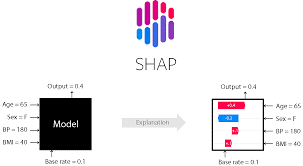

In [ ]:
pip install shap

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import shap
import graphviz
sns.set_style('darkgrid')

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()


In [ ]:
feature_names = ybank_df.dropna().drop(['Close','Open','High','Low','Month','Year'],axis=1).columns
x_shap = x_train
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(rfr)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_shap)


In [ ]:
feature_names

In [ ]:
# Forceplot for values
shap.force_plot(explainer.expected_value,shap_values,x_shap)

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0,:], x_shap[0,:], matplotlib=True,feature_names=feature_names)

The starting point for the analysis is the average result in our data set. SHAP checks how the deviation from the average was impacted by each variable. The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions. Each feature value is a force that either increases or decreases the prediction. Each feature contributing to pushing the model output from the base value to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

# **Conclusion**

The primary goal is to forecast the monthly closing price of Yes Bank's stock, considering the impact of the 2018 fraud case, using historical monthly stock price data. The dataset includes metrics such as opening, closing, highest, and lowest prices for each month since the establishment of Yes Bank.

Due to fluctuations over time, especially significant events like the 2018 fraud, variables like 'Close' and 'Open', 'High', 'Low' may exhibit positive skewness. Applying log transformation has led to a more symmetrical distribution, improving the accuracy of predictions. The closing price shows high correlation with other variables.

The log transformation effectively reduced outliers in the dataset, contributing to a more robust model. However, completely removing outliers from a small dataset is generally not advisable.

I aggregated 'Open', 'High', and 'Low' features by taking their mean and engineered additional features using lag values to capture temporal trends and patterns, including potential effects of the fraud case.

Four machine learning models were constructed - Linear Regression, Lasso Regression, Ridge Regression, and Random Forest. Evaluation metrics provide insights into data, aiding decision-making for better outcomes. Cross-validation was utilized to estimate optimal values, ensuring robust and generalizable models for new data.

SHAP (SHapley Additive exPlanations) is an advanced method for studying model explainability in machine learning. It calculates the contribution of each feature to the final prediction, providing insights into how individual components of the model influence the overall outcome.

Given the dataset and features, our model demonstrates strong performance across all data points, showcasing its robustness in capturing patterns and trends within the data. This indicates that the model effectively generalizes to unseen instances and maintains consistent accuracy in its predictions. Such reliability underscores the efficacy of our model in addressing the complexities inherent in the dataset, thereby instilling confidence in its predictive capabilities.








### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***